# Twitter Sentiment Analysis: Semester Project

#### FIRST THING FIRST .... Loading the dataset into dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

In [2]:
dataset = pd.DataFrame()

In [3]:
dataset = pd.read_csv('Tweets_Dataset.txt', delimiter = '\t', names = ['Seq No','Topic','label', 'Tweet'] )

In [4]:
dataset.head(-10)

,Seq No,Topic,label,Tweet
0,801989080477154944,#ArianaGrande,0,#ArianaGrande Ari By Ariana Grande 80% Full ht...
1,801989272341453952,#ArianaGrande,1,Ariana Grande KIIS FM Yours Truly CD listening...
2,801990978424962944,#ArianaGrande,1,Ariana Grande White House Easter Egg Roll in W...
3,801996232553963008,#ArianaGrande,1,#CD #Musics Ariana Grande Sweet Like Candy 3.4...
4,801998343442407040,#ArianaGrande,1,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...
...,...,...,...,...
11995,805687944241516544,zac efron,0,#ZacEfron and Seth Rogen Are Shirtless and Wea...
11996,805687959026601984,zac efron,0,5 Incidents of How Zac Efron Is Inspirational ...
11997,805689537024274434,zac efron,0,Alexandra Daddario on Working with Zac Efron a...
11998,805692823752146944,zac efron,1,There could be a thousand more Hairspray remak...


In [5]:
dataset.isnull().sum()

Seq No    0
Topic     0
label     0
Tweet     0
dtype: int64

In [6]:
dataset['label'].unique()

array([ 0,  1, -1,  2, -2], dtype=int64)

In [7]:
result = dataset.groupby('label').count()

In [8]:
result.Tweet

label
-2     175
-1    3408
 0    5988
 1    2308
 2     131
Name: Tweet, dtype: int64

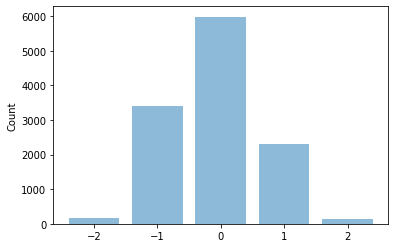

In [9]:
plt.bar(result.index,result.Tweet, align='center', alpha=0.5)
plt.xticks(result.index)
plt.ylabel('Count')
plt.show()

In [10]:
#Cleaing Tweets

In [11]:
pd.set_option('display.max_colwidth', -1)
dataset.Tweet.head()

0    #ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA                             
1    Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande                                    
2    Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande                                            
3    #CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK
4    SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈  #LOTB… https://t.co/tEd8rftAxV                   
Name: Tweet, dtype: object

In [20]:
dataset = dataset.drop(['Seq No','Topic'],axis=1)

In [21]:
def TidyTweets(string):
    # for removing twitter handles
    handlepattern = "@\w*"
    hashtags = "^#"
    punctuationpattern = "[^a-zA-Z]" 
    urlpattern = "http\S+"
    tweet = re.sub(urlpattern," ",string)
    tweet = re.sub(handlepattern,"",tweet)
    tweet = re.sub(punctuationpattern," ",tweet)
    tweet = re.sub(hashtags,"",tweet)
    return tweet
    
#Testing the functionality    
a = TidyTweets("@ariana Grande @ypu Don't call me #Angle OLALALALA!!   ")
print(a)

 Grande  Don t call me  Angle OLALALALA     


In [22]:
dataset['TidyTweet'] =  dataset['Tweet'].apply(lambda x: TidyTweets(x))

In [23]:
dataset.TidyTweet

0         ArianaGrande Ari By Ariana Grande     Full    Singer  Actress                                  
1        Ariana Grande KIIS FM Yours Truly CD listening party in Burbank    ArianaGrande                 
2        Ariana Grande White House Easter Egg Roll in Washington    ArianaGrande                         
3         CD  Musics Ariana Grande Sweet Like Candy     oz     ML Sealed In Box      Authenic New        
4        SIDE TO SIDE     sidetoside  arianagrande  musically  comunidadgay  lgbt    LOTB                
                                                ...                                                      
12005     update  Zac Efron kissing a puppy                                                              
12006     zac efron sex pic skins michelle sex                                                           
12007    First Look at Neighbors   with Zac Efron Shirtless   PHOTO        zacefron                      
12008    zac efron poses nude  lovely libra po

In [24]:
def casefolding_Tweets(tweet):
    low=""
    for word in tweet:
        low += (word.casefold())
    return low

In [25]:
print(casefolding_Tweets("QASDDDF"))

qasdddf


In [26]:
dataset['TidyTweet'] =  dataset['TidyTweet'].apply(lambda x: casefolding_Tweets(x))

In [27]:
dataset.head()

,label,Tweet,TidyTweet
0,0,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA,arianagrande ari by ariana grande full singer actress
1,1,Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande,ariana grande kiis fm yours truly cd listening party in burbank arianagrande
2,1,Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande,ariana grande white house easter egg roll in washington arianagrande
3,1,#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK,cd musics ariana grande sweet like candy oz ml sealed in box authenic new
4,1,SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈 #LOTB… https://t.co/tEd8rftAxV,side to side sidetoside arianagrande musically comunidadgay lgbt lotb


In [28]:
from  nltk.stem.porter import*
stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [29]:
dataset['TidyTweet'] = (dataset['TidyTweet'].apply(stem_sentences))

In [33]:
tweet_tokenizer  = TweetTokenizer()
def tweetToken(tweet):
    return tweet_tokenizer.tokenize(tweet)

In [34]:
dataset['TweetToken'] =  dataset['TidyTweet'].apply(lambda x: tweetToken(x))

In [35]:
dataset.tail()

,label,Tweet,TidyTweet,TweetToken
12005,1,@dansen17 update: Zac Efron kissing a puppy https://t.co/4hTw1U8Azs,updat zac efron kiss a puppi,"[updat, zac, efron, kiss, a, puppi]"
12006,0,#zac efron sex pic skins michelle sex https://t.co/EQFbbfuJSA,zac efron sex pic skin michel sex,"[zac, efron, sex, pic, skin, michel, sex]"
12007,1,First Look at Neighbors 2 with Zac Efron Shirtless! (PHOTO)... https://t.co/5C68gj5D9V #zacefron,first look at neighbor with zac efron shirtless photo zacefron,"[first, look, at, neighbor, with, zac, efron, shirtless, photo, zacefron]"
12008,1,zac efron poses nude #lovely libra porn https://t.co/ukneYt2Wl2,zac efron pose nude love libra porn,"[zac, efron, pose, nude, love, libra, porn]"
12009,0,"#Fashion #Style The Paperboy (NEW Blu-ray Disc) Matthew McConaughey, Zac Efron, #NicoleKidman… https://t.co/zgHXBjdBg5",fashion style the paperboy new blu ray disc matthew mcconaughey zac efron nicolekidman,"[fashion, style, the, paperboy, new, blu, ray, disc, matthew, mcconaughey, zac, efron, nicolekidman]"


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7,stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(dataset.TidyTweet).toarray()

In [62]:
y = dataset.iloc[:, 0].values
print(y)

[0 1 1 ... 1 1 0]


In [63]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

[[  1  32  12   1   0]
 [  0 360 317  20   0]
 [  1 162 912 113   0]
 [  0  16 238 187   0]
 [  0   0   8  20   2]]
              precision    recall  f1-score   support

          -2       0.50      0.02      0.04        46
          -1       0.63      0.52      0.57       697
           0       0.61      0.77      0.68      1188
           1       0.55      0.42      0.48       441
           2       1.00      0.07      0.12        30

    accuracy                           0.61      2402
   macro avg       0.66      0.36      0.38      2402
weighted avg       0.61      0.61      0.59      2402

0.6086594504579517


In [66]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[  4  26   2  14   0]
 [ 29 370  45 247   6]
 [ 34 325 144 646  39]
 [ 11  44  36 294  56]
 [  0   1   2  19   8]]
              precision    recall  f1-score   support

          -2       0.05      0.09      0.06        46
          -1       0.48      0.53      0.51       697
           0       0.63      0.12      0.20      1188
           1       0.24      0.67      0.35       441
           2       0.07      0.27      0.12        30

    accuracy                           0.34      2402
   macro avg       0.30      0.33      0.25      2402
weighted avg       0.50      0.34      0.31      2402

0.34138218151540384
